#### This notebook is in reference to the concepts laid out in 'Practical Statistics for Data Scientist - 50+ Essential Concepts Using R and Python' by Peter Bruce, Andrew Bruce, and Peter Gedeck

#### Dataset below is sourced from: https://www.kaggle.com/kumarajarshi/life-expectancy-who

In [77]:
#import World Health Organization Dataset for life expectancy
import sklearn as sk
import pandas as pd

csv = 'life_expectancy_dataset.csv'
cols_list = ['country', 'year', 'status', 'life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol', 
             'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi', 'under_five_deaths', 'polio',
             'total_expenditure', 'diphtheria', 'hiv_aids', 'gdp', 'population', 'thinness_1_to_19_years', 
             'thinness_5_to_9_years', 'income_composition_of_resources', 'schooling']

df = pd.read_csv(csv, names=cols_list, header=0)
display(df)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_to_19_years,thinness_5_to_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [81]:
# basic data cleaning to look at the year w/ the most observations
df_grouped = df.groupby('year')['year'].count()
print(df_grouped)

# all years from 2000-2015 have 183, except 2013 has 193 - Since observations are similar, I'm going to look at the most recent 2015 data
df_2015 = df[df['year'] == 2015]
print("Unique 'year' values in Dataframe:", df_2015['year'].unique())

year
2000    183
2001    183
2002    183
2003    183
2004    183
2005    183
2006    183
2007    183
2008    183
2009    183
2010    183
2011    183
2012    183
2013    193
2014    183
2015    183
Name: year, dtype: int64
Unique 'year' values in Dataframe: [2015]


#### Summary of Descrpitive Statistics by Column

In [82]:
# display descriptive statistics of each column
for col in df_2015.columns:
    if col not in ['country', 'year', 'status']: 
        display(df_2015[col].describe())
    else:
        print(f"No Descriptive Statistics for {col} - Categorical Variable")

No Descriptive Statistics for country - Categorical Variable
No Descriptive Statistics for year - Categorical Variable
No Descriptive Statistics for status - Categorical Variable


count    183.000000
mean      71.616940
std        8.123706
min       51.000000
25%       65.750000
50%       73.900000
75%       76.950000
max       88.000000
Name: life_expectancy, dtype: float64

count    183.000000
mean     152.863388
std       97.561184
min        1.000000
25%       74.000000
50%      138.000000
75%      213.000000
max      484.000000
Name: adult_mortality, dtype: float64

count    183.000000
mean      23.803279
std       83.683762
min        0.000000
25%        0.000000
50%        2.000000
75%       17.000000
max      910.000000
Name: infant_deaths, dtype: float64

count     6.000000
mean      5.288333
std       4.038115
min       0.010000
25%       2.492500
50%       5.285000
75%       8.017500
max      10.660000
Name: alcohol, dtype: float64

count    183.000000
mean       2.383906
std       27.461032
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      364.975229
Name: percentage_expenditure, dtype: float64

count    174.000000
mean      82.425287
std       24.008492
min        6.000000
25%       78.750000
50%       93.000000
75%       97.000000
max       99.000000
Name: hepatitis_b, dtype: float64

count      183.000000
mean      1502.901639
std       7842.394928
min          0.000000
25%          0.000000
50%         17.000000
75%        202.000000
max      90387.000000
Name: measles, dtype: float64

count    181.000000
mean      42.754144
std       20.685702
min        2.500000
25%       24.300000
50%       48.600000
75%       61.400000
max       77.600000
Name: bmi, dtype: float64

count     183.000000
mean       31.612022
std       107.779778
min         0.000000
25%         0.000000
50%         3.000000
75%        21.000000
max      1100.000000
Name: under_five_deaths, dtype: float64

count    183.000000
mean      83.207650
std       24.245778
min        5.000000
25%       83.000000
50%       93.000000
75%       97.000000
max       99.000000
Name: polio, dtype: float64

count    2.000000
mean     7.080000
std      1.527351
min      6.000000
25%      6.540000
50%      7.080000
75%      7.620000
max      8.160000
Name: total_expenditure, dtype: float64

count    183.000000
mean      84.633880
std       22.162793
min        6.000000
25%       83.500000
50%       93.000000
75%       97.000000
max       99.000000
Name: diphtheria, dtype: float64

count    183.000000
mean       0.660656
std        1.344702
min        0.100000
25%        0.100000
50%        0.100000
75%        0.400000
max        9.300000
Name: hiv_aids, dtype: float64

count      154.000000
mean      7185.331746
std      11697.508913
min         33.681223
25%        766.008101
50%       2916.228918
75%       7290.107448
max      66346.522670
Name: gdp, dtype: float64

count    1.420000e+02
mean     1.109741e+07
std      2.896230e+07
min      2.966000e+03
25%      2.680710e+05
50%      2.076086e+06
75%      9.940296e+06
max      2.581621e+08
Name: population, dtype: float64

count    181.000000
mean       4.534807
std        4.099425
min        0.100000
25%        1.500000
50%        3.500000
75%        6.500000
max       26.700000
Name: thinness_1_to_19_years, dtype: float64

count    181.000000
mean       4.575691
std        4.180785
min        0.100000
25%        1.500000
50%        3.400000
75%        6.400000
max       27.300000
Name: thinness_5_to_9_years, dtype: float64

count    173.000000
mean       0.691740
std        0.153412
min        0.347000
25%        0.565000
50%        0.723000
75%        0.798000
max        0.948000
Name: income_composition_of_resources, dtype: float64

count    173.000000
mean      12.927168
std        2.912366
min        4.900000
25%       10.800000
50%       13.100000
75%       15.000000
max       20.400000
Name: schooling, dtype: float64

#### Distribution of life_expectancy

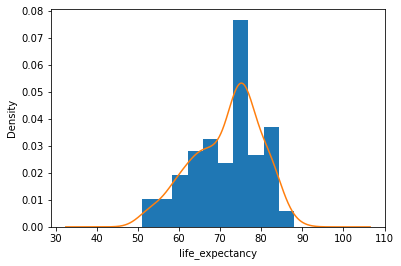

In [89]:
# plot histogram of life expectancy
import matplotlib.pyplot as plt

hist = df_2015['life_expectancy'].plot.hist(density=True)
hist.set_xlabel("life_expectancy")

# histogram with density estimate
dens = df_2015['life_expectancy'].plot.density(ax=hist) # ax argument plots the density curve w/ histogram (or specified axis)

#### Number of Observations by 'status'

Text(0, 0.5, 'observations')

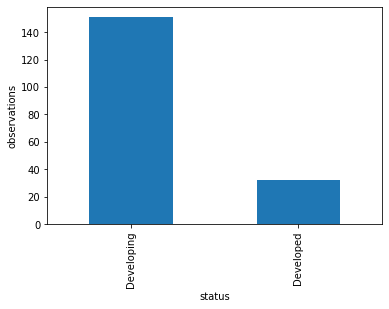

In [97]:
bar = df_2015['status'].value_counts().plot.bar()
bar.set_xlabel('status')
bar.set_ylabel('observations')

#### Correlation Analysis

<AxesSubplot:>

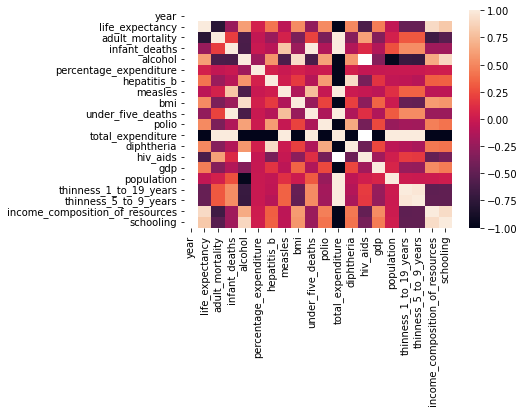

In [99]:
# make heatmap for feature correlation
import seaborn as sns
sns.heatmap(df_2015.corr())

Correlation Coefficient:
                  hiv_aids  life_expectancy
hiv_aids         1.000000        -0.608345
life_expectancy -0.608345         1.000000


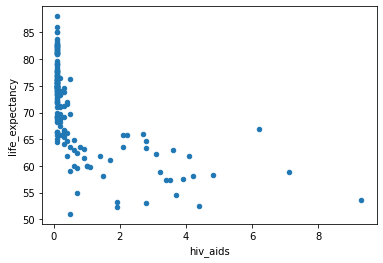

In [105]:
# create scatter plot of life_expectancy & total_expenditure
scatter = df_2015.plot.scatter(x='hiv_aids', y='life_expectancy')
print("Correlation Coefficient:\n", df_2015[['hiv_aids', 'life_expectancy']].corr())

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

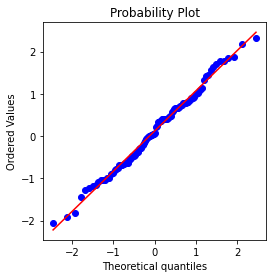

In [112]:
# QQ plot of a sample of 100 values drawn from a standard normal distribution (separate from life expectancy dataset)
import scipy.stats as stats

fig,ax = plt.subplots(figsize=(4,4))
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

In [124]:
# use bootstrap approach for mean of life expectancy
from sklearn.utils import resample

sample_means = []
for nrepeat in range(1000):
    og_sample = df_2015['life_expectancy']
    sample = resample(og_sample)
    sample_means.append(sample.mean())
results = pd.Series(sample_means)
print('Bootstrap Statistics:')
print(f'original mean: {og_sample.mean()}')
print(f'bootstrap mean: {results.mean()}')
print(f'bias: {results.mean() - og_sample.mean()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original mean: 71.61693989071036
bootstrap mean: 71.60416010928952
bias: -0.012779781420832137
std. error: 0.6156816968974338


((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

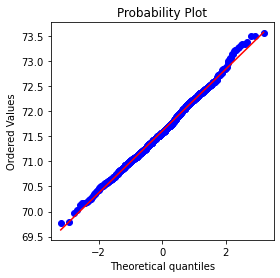

In [125]:
# QQ plot of a bootstrap re-sample of life_expectancy mean

fig,ax = plt.subplots(figsize=(4,4))
stats.probplot(results, plot=ax)